In [1]:
import numpy as np
import sys

import run_utils

sys.path.append('../') 

from reclab.recommenders import LibFM
from reclab import data_utils

# ML 100k

In [3]:
users, items, ratings = data_utils.read_dataset('ml-100k')

default_params = dict(num_two_way_factors=8, learning_rate=0.1,
              bias_reg=0., one_way_reg=0., two_way_reg=0., 
              num_iter=100)

tuner = run_utils.ModelTuner((users, items, ratings), default_params,
                             n_fold=5, verbose=True)

In [8]:
regs = [0.01, 0.1, 0.5]
sss = [0.1, 0.05, 0.01, 0.005]

params_list = [('reg={},ss={}'.format(reg, ss), dict(bias_reg=reg, one_way_reg=reg, two_way_reg=reg, 
                                                     learning_rate=ss)) for reg in regs for ss in sss]

res_dict = tuner.evaluate_list(params_list)

Evaluating: {'bias_reg': 0.01, 'one_way_reg': 0.01, 'two_way_reg': 0.01, 'learning_rate': 0.1}
Fold 1/5, mse=1.1957447730173631
Fold 2/5, mse=1.1770286790003615
Fold 3/5, mse=1.201510265454075
Fold 4/5, mse=1.14374804214651
Fold 5/5, mse=1.1886817128341889
Average MSE: 1.1813426944904997
Evaluating: {'bias_reg': 0.01, 'one_way_reg': 0.01, 'two_way_reg': 0.01, 'learning_rate': 0.05}
Fold 1/5, mse=1.1092381714282755
Fold 2/5, mse=1.0912825315980428
Fold 3/5, mse=1.0940479779343675
Fold 4/5, mse=1.0763719106580127
Fold 5/5, mse=1.1150368194021392
Average MSE: 1.0971954822041674
Evaluating: {'bias_reg': 0.01, 'one_way_reg': 0.01, 'two_way_reg': 0.01, 'learning_rate': 0.01}
Fold 1/5, mse=1.0151274025070012
Fold 2/5, mse=1.0057559279079638
Fold 3/5, mse=0.9936142047155477
Fold 4/5, mse=1.002399320832974
Fold 5/5, mse=0.987691702547221
Average MSE: 1.0009177117021415
Evaluating: {'bias_reg': 0.01, 'one_way_reg': 0.01, 'two_way_reg': 0.01, 'learning_rate': 0.005}
Fold 1/5, mse=0.96838284008152

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

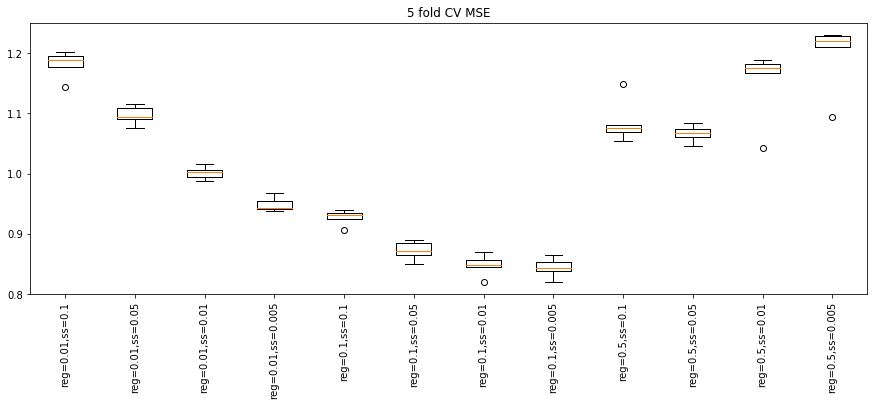

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,5])
plt.title("5 fold CV MSE")
plt.boxplot(res_dict.values(), labels=res_dict.keys());
plt.xticks(rotation=90) 

In [11]:
dims = [8, 16, 32, 56, 128, 256]
params_list = [('dim={}'.format(k), dict(bias_reg=0.1, one_way_reg=0.1, two_way_reg=0.1, 
                                         learning_rate=0.005, num_two_way_factors=k)) for k in dims]

res_dict = tuner.evaluate_list(params_list)

Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1, 'learning_rate': 0.005, 'num_two_way_factors': 8}
Fold 1/5, mse=0.8642756163705609
Fold 2/5, mse=0.8530917296032209
Fold 3/5, mse=0.8379744207027668
Fold 4/5, mse=0.8432846551603826
Fold 5/5, mse=0.8197650316707888
Average MSE: 0.843678290701544
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1, 'learning_rate': 0.005, 'num_two_way_factors': 16}
Fold 1/5, mse=0.8606387026644754
Fold 2/5, mse=0.850357727390412
Fold 3/5, mse=0.8387158031762189
Fold 4/5, mse=0.838599096338516
Fold 5/5, mse=0.8160730047719573
Average MSE: 0.8408768668683159
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1, 'learning_rate': 0.005, 'num_two_way_factors': 32}
Fold 1/5, mse=0.8591696322279365
Fold 2/5, mse=0.8471232670026164
Fold 3/5, mse=0.8375817944600631
Fold 4/5, mse=0.8404724286163197
Fold 5/5, mse=0.8105690942841294
Average MSE: 0.8389832433182131
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 

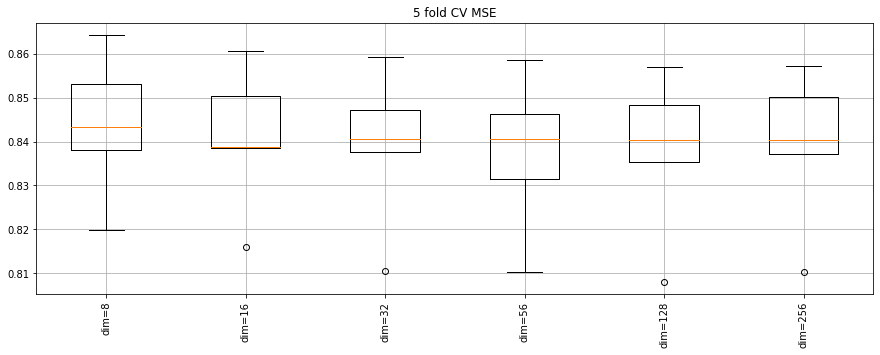

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,5])
plt.title("5 fold CV MSE")
plt.boxplot(res_dict.values(), labels=res_dict.keys());
plt.xticks(rotation=90) 
plt.grid()

# ML 10M

In [17]:
datafile = '~/recsys/recsys-eval/data/ml-10M100K/ratings.dat'

In [4]:
users, items, ratings = data_utils.read_dataset('ml-100k')


In [5]:
len(ratings)

100000